# Goal

* Discover correlation between features and target variable

* Build a regression model to predict home values of single family properties in California using features of the zillow dataset from 2017.

---

# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import wrangle as w
import explore as x
import preprocess as p
import evaluate as e
import model as m

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

---

# Aquire

* Data acquired from Codeup's MySQL server
* Initial shape was (52441, 9)
* Each row represents property attributes 
* Each column represents a feature of the property.

---

# Prepare

* Renamed columns
* Dropped all null values
* Dropped all beds and baths with 0 
* Dropped tax_amount, property_type, and transaction_date
* Casted bedrooms, square_ft, tax_value, and year to 'int'
* Split data (70%, 15%, 15%)

## Data dictionary

|Feature|Definition|
|:----------------|:----------------------------------------|
|bedrooms         |   total bedrooms                          |
|bathrooms        |   total bathrooms                         | 
|square_ft        |   total square ft                         |
|tax_value        |   home value                              |
|year             |   year built                              |
|county           |   county name                             |
|property_type    |   id for single family property           |
|transaction_date |   date of transaction                     |
|bathrooms_bin    |   total bathrooms in bins                 |	
|bedrooms_bin     |   total bedrooms in bins                  |	
|square_ft_bin    |   total square_ft in bins                 |	
|decade           |   decade built                            |
|total_rooms      |   sum of bathrooms and bedrooms           |
|total_rooms_bin  |   sum of bathrooms and bedrooms in bins   |	

---

In [2]:
#aquire prepped data
df = w.clean_zillow()

found data


In [3]:
#bin data
df = w.bin_data(df)
df.head()

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_bin,bedrooms_bin,square_ft_bin,decade,total_rooms,total_rooms_bin
0,4,3.5,3100,1023282,1998,Orange,3,4,3500,1990,7.5,32
1,2,1.0,1465,464000,1967,Ventura,1,2,1500,1960,3.0,3
2,3,2.0,1243,564778,1962,Orange,2,3,1500,1960,5.0,5
3,4,3.0,2376,145143,1970,Los Angeles,3,4,2500,1970,7.0,32
4,4,3.0,2962,773303,1950,Los Angeles,3,4,3000,1950,7.0,32


In [4]:
#split data
train, val, test = w.split_data(df)

#verify shape
train.shape, val.shape, test.shape

((36568, 12), (7836, 12), (7837, 12))

---

# Exploration

## Does the number of rooms affect the tax value?

Ho: There is no significant correlation between bedrooms and tax value

Ha: There is a significant correlation between bedrooms and tax value

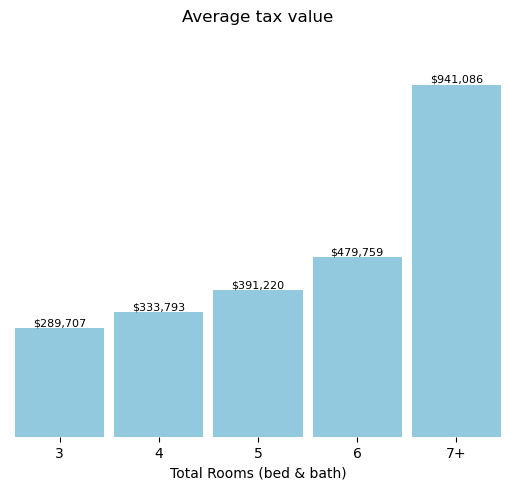

In [5]:
#create bar plot
x.bar_plt(train, 'total_rooms_bin', 'tax_value')

In [6]:
#run test
x.spear_test(train, 'total_rooms_bin', 'tax_value')

a = .05
p = 0.0

We reject the null hypothesis


## Conclusion: There is a correlation between bedrooms and tax value.

---

## Does the size of the property affect tax value?

Ho: There is no significant correlation between square ft and tax value

Ha: There is a significant correlation between square ft and tax value

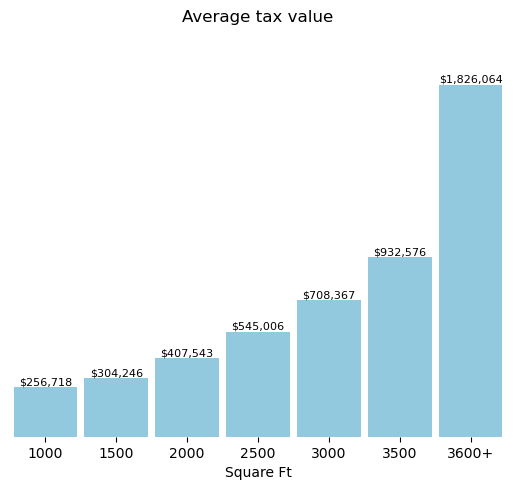

In [7]:
x.bar_plt2(train, 'square_ft_bin', 'tax_value')

In [8]:
x.spear_test(train, 'square_ft_bin', 'tax_value')

a = .05
p = 0.0

We reject the null hypothesis


## Conclusion: There is a correlation between square ft and tax value.

---

## Does the year built also affect tax_value?

Ho: There is no significant correlation between decade and tax value

Ha: There is a significant correlation between decade and tax value

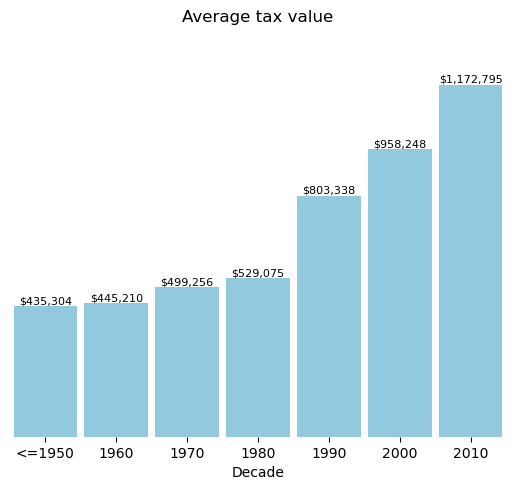

In [9]:
x.bar_plt3(train, 'decade', 'tax_value')

In [10]:
x.spear_test(train, 'decade', 'tax_value')

a = .05
p = 0.0

We reject the null hypothesis


## Conclusion: There is a correlation between decade built and tax value

---

## Does the county have any correlation with tax value?

Ho: There is no significant correlation between county and tax value

Ha: There is a significant correlation between county and tax value

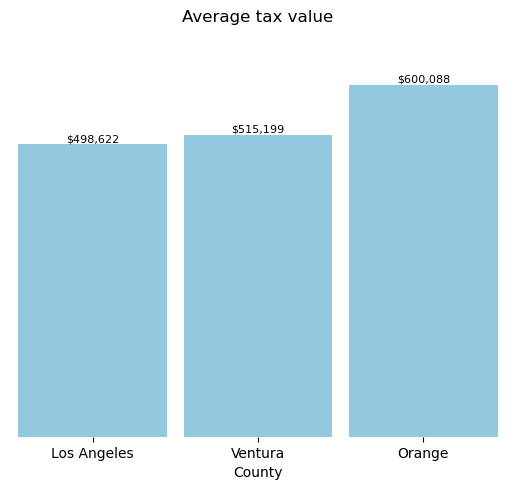

In [11]:
x.bar_plt4(train, 'county', 'tax_value')

In [12]:
x.spear_test(train, 'county', 'tax_value')

a = .05
p = 1.3671694016711101e-266

We reject the null hypothesis


## Conclusion: There is a correlation between county built and tax value


---

## Exploration Summary

* Increase in rooms increases tax value
* Increase in square ft increases tax value
* The older a property is the tax value decreases
* Properties in Orange County have highest average tax value
* All these features have correlation. I will keep all of them

---

# Modeling

* Baseline = $749,394

* Evaluation metric is RMSE 

In [13]:
to_scale = ['bedrooms', 'bathrooms', 'square_ft', 'year', 'total_rooms', 'bathrooms_bin', 'bedrooms_bin', 'square_ft_bin', 'decade', 'total_rooms_bin']
train, val, test = p.scale_data(train, val, test, to_scale)

In [14]:
train, val, test = p.dummies(train, val, test)

In [15]:
X_train, y_train = p.xy_split(train)
X_val, y_val = p.xy_split(val)
X_test, y_test = p.xy_split(test)

In [16]:
X_train.shape, X_val.shape, X_test.shape

((36568, 13), (7836, 13), (7837, 13))

## Linear Regression Model

In [17]:
lm = LinearRegression()

m.train_model(lm, X_train, y_train, X_val, y_val)

The train RMSE is $572,093
The validate RMSE is $590,532


LinearRegression()

## Polynomial Linear Regression Model

In [18]:
poly = PolynomialFeatures()
X_train_second = poly.fit_transform(X_train)
X_val_second = poly.fit_transform(X_val)

In [19]:
lm = LinearRegression()

m.train_model(lm, X_train_second, y_train, X_val_second, y_val)

The train RMSE is $514,190
The validate RMSE is $561,995


LinearRegression()

## Lasso Lars Model

In [20]:
ll = LassoLars(alpha = .5)

m.train_model(ll, X_train, y_train, X_val, y_val)

The train RMSE is $572,088
The validate RMSE is $590,571


LassoLars(alpha=0.5)

## Test Model

In [21]:
poly = PolynomialFeatures()
X_train_second = poly.fit_transform(X_train)
X_val_second = poly.fit_transform(X_val)

In [22]:
lm = LinearRegression()

m.test_model(lm, X_test, y_test)

The test RMSE is $541,704


LinearRegression()

In [23]:
def preds(X_data, y_data):
    
    preds = pd.DataFrame({'y_actual': y_data,
                         'y_mean': y_data.mean(),
                         'y_hat': lm.predict(X_data)})
    
    #add prediction residuals to dataframe
    preds['y_hat_resids'] = preds.y_hat - preds.y_actual
    
    return preds


In [24]:
preds(X_train, y_train).head()

,y_actual,y_mean,y_hat,y_hat_resids
44648,316414,527318.200284,2.362801e+05,-80133.889041
33031,66845,527318.200284,5.308902e+05,464045.192341
810,474197,527318.200284,5.247029e+05,50505.876733
11555,256558,527318.200284,9.556379e+05,699079.905046
33070,1155958,527318.200284,1.080123e+06,-75834.984789


In [25]:
e.plot_residuals(preds, 'y_actual', 'y_hat_resids')

ValueError: Could not interpret value `y_actual` for parameter `x`

In [26]:
#plot residuals for predictions
sns.scatterplot(data = preds, x = 'y_actual', y = 'y_hat_resids')

plt.hlines(0, 0, preds.y_actual.max())

plt.show()

ValueError: Could not interpret value `y_actual` for parameter `x`

# Model Summary

* Baseline = $749,394

* Top 3 models outperformed baseline

* The polynomial linear regression model performed the best. 

* Test on model resulted in a RMSE of $541,704

* $207,690 less than baseline

# Conclusion

* All features I explored had correlation with tax value

* My best models are linear regression, polynomial linear regression model, and lasso lars model

* All models outperformed baseline

* The polynomial linear regression was the best model with the lowest RMSE

# Recommendations